In [75]:
import os, glob
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions import flatten_list, load_txt_as_lst, write_file

# Build eval df

In [5]:
lookup_path = "/home/craig.car/repos/chiron/chironata/data/cts_lookup_table.json"
with open(lookup_path) as f:
    lookup = json.load(f)

lookup["urn:cts:greekLit:tlg0640.tlg001"]

['tlg0640.tlg001.ogl-eng1.xml', 'alciphron_1896']

In [6]:
for path in ["/scratch/craig.car/english_trans-dev/tlg0640.tlg001.ogl-eng1.xml"]:
    prefix = os.path.splitext(path)[0]
    print(prefix)

/scratch/craig.car/english_trans-dev/tlg0640.tlg001.ogl-eng1


In [7]:
text_ctsurn = []
num_transl = []
transl_langs = []
num_src_sents = []
text_top_1s = []
text_top_5s = []
text_top_10s = []
num_tgt_sents = []
num_nulls_all_transl = []
names_translations = []
transl_top10s = []
source_edition = []

not_transl_keys = ["num_src_sents", "num_translations", "text_top1", "text_top5", "text_top10"]

eval_dicts_dir = "/home/craig.car/repos/chiron/chironata/eval_datafiles/"
for eval_json_path in glob.iglob(eval_dicts_dir+"*.json"):
    ctsurn = os.path.splitext(os.path.basename(eval_json_path))[0]
    with open(eval_json_path) as f:
        eval_json = json.load(f)
    text_ctsurn.append(ctsurn)
    # print(eval_json["apolloniusRhodius_1_1791"].keys())
    num_transl.append(eval_json["num_translations"])
    num_src_sents.append(eval_json["num_src_sents"])
    text_top_1s.append(eval_json["text_top1"])
    text_top_5s.append(eval_json["text_top5"])
    text_top_10s.append(eval_json["text_top10"])
    text_langs = set()
    num_transl_sents = 0
    num_nulls = []
    transl_names = []
    top10s_transl = []
    translations = []
    for key in eval_json.keys():
        if key not in not_transl_keys:
            # print(eval_json[key].keys())
            text_langs.add(eval_json[key]["tgt_lang"])
            num_transl_sents += eval_json[key]["num_tgt_sents"]
            transl_names.append(key)
            top10s_transl.append("%.3f" % eval_json[key]["transl_top10"])
            num_nulls.append(eval_json[key]["num_nulls"])
            # print(num_transl_sents)
    transl_langs.append(text_langs)
    num_tgt_sents.append(num_transl_sents)
    names_translations.append(transl_names)
    transl_top10s.append(top10s_transl)
    num_nulls_all_transl.append(num_nulls)


In [8]:
print(len(text_ctsurn))
print(len(num_transl))
print(len(transl_langs))
print(len(num_src_sents))
print(len(text_top_1s))
print(len(text_top_5s))
print(len(text_top_10s))
print(len(num_tgt_sents))
print(len(num_nulls_all_transl))
print(len(names_translations))
print(len(transl_top10s))
print(len(num_nulls_all_transl))

709
709
709
709
709
709
709
709
709
709
709
709


In [9]:
eval_df = pd.DataFrame(text_ctsurn)
eval_df.columns = ["ctsurn"]

In [10]:
eval_df["number_src_sents"] = num_src_sents
eval_df["number_translations"] = num_transl
eval_df["names_translations"] = names_translations
eval_df["translation_languages"] = transl_langs
eval_df["num_tgt_sents_all_translations"] = num_tgt_sents
eval_df["num_src2null_all_translations"] = num_nulls_all_transl
eval_df["text_wide_recall@1"] = text_top_1s
eval_df["text_wide_recall@5"] = text_top_5s
eval_df["text_wide_recall@10"] = text_top_10s
eval_df["translations_recall@10"] = transl_top10s

In [11]:
eval_df.round(3)

,ctsurn,number_src_sents,number_translations,names_translations,translation_languages,num_tgt_sents_all_translations,num_src2null_all_translations,text_wide_recall@1,text_wide_recall@5,text_wide_recall@10,translations_recall@10
0,urn:cts:greekLit:tlg0001.tlg001,1738,3,"[apolloniusRhodius_1_1791, tlg0001.tlg001.opp-...","{en, it, fr}",18327,"[0, 0, 0]",0.179,0.296,0.353,"[0.024, 0.605, 0.432]"
1,urn:cts:greekLit:tlg0003.tlg001,4419,7,"[thucydides_1_1864, thucydides_1_1869, thucydi...","{en, de, fr}",53054,"[0, 1, 173, 36, 275, 62, 0]",0.130,0.194,0.225,"[0.698, 0.659, 0.010, 0.156, 0.010, 0.010, 0.032]"
2,urn:cts:greekLit:tlg0004.tlg001,6440,1,[diogenesLaertius_1853],{en},11907,[3],0.436,0.654,0.737,[0.737]
3,urn:cts:greekLit:tlg0005.tlg001,549,5,"[theocritus_1855, theocritus_1878, theocritus_...","{en, de, fr}",23922,"[1, 0, 0, 0, 0]",0.234,0.409,0.499,"[0.468, 0.605, 0.576, 0.470, 0.377]"
4,urn:cts:greekLit:tlg0005.tlg002,94,5,"[theocritus_1855, theocritus_1878, theocritus_...","{en, de, fr}",23922,"[0, 0, 0, 0, 0]",0.123,0.200,0.262,"[0.298, 0.447, 0.181, 0.234, 0.149]"
...,...,...,...,...,...,...,...,...,...,...,...
704,urn:cts:latinLit:stoa0255.stoa010,1539,2,"[seneca_1877, seneca_1889]","{en, fr}",36068,"[0, 0]",0.664,0.858,0.919,"[0.905, 0.933]"
705,urn:cts:latinLit:stoa0255.stoa011,110,2,"[seneca_1877, seneca_1889]","{en, fr}",36068,"[0, 0]",0.686,0.855,0.914,"[0.855, 0.973]"
706,urn:cts:latinLit:stoa0255.stoa012,295,2,"[seneca_1877, seneca_1889]","{en, fr}",36068,"[0, 0]",0.646,0.814,0.863,"[0.769, 0.956]"
707,urn:cts:latinLit:stoa0255.stoa013,460,2,"[seneca_1877, seneca_1889]","{en, fr}",36068,"[0, 0]",0.687,0.872,0.936,"[0.915, 0.957]"


# Get corpus-level stats

In [12]:
corpus_top1 = eval_df["text_wide_recall@1"].sum()/eval_df.shape[0]
corpus_top5 = eval_df["text_wide_recall@5"].sum()/eval_df.shape[0]
corpus_top10 = eval_df["text_wide_recall@10"].sum()/eval_df.shape[0]

print(corpus_top1)
print(corpus_top5)
print(corpus_top10)

0.21667578986224637
0.3270881878940083
0.3876063934476651


# Top 25 texts by recall @10

In [13]:
eval_df.sort_values("text_wide_recall@10", ascending=[False]).head(25)

,ctsurn,number_src_sents,number_translations,names_translations,translation_languages,num_tgt_sents_all_translations,num_src2null_all_translations,text_wide_recall@1,text_wide_recall@5,text_wide_recall@10,translations_recall@10
661,urn:cts:latinLit:phi1212.phi003,392,1,[apuleius_1878],{en},8847,[0],0.757653,0.989796,1.043367,[1.043]
595,urn:cts:latinLit:phi0474.phi055,2011,1,[cicero_1874],{en},5692,[0],0.776231,0.945301,0.987568,[0.988]
666,urn:cts:latinLit:phi1348.abo011,517,2,"[suetonius_1855-1897, caesar_commentaries_1867]","{de, fr}",13468,"[0, 0]",0.709865,0.913926,0.984526,"[0.971, 0.998]"
433,urn:cts:greekLit:tlg0074.tlg004,282,1,[arrian_1860],{fr},3216,[0],0.549645,0.872340,0.971631,[0.972]
323,urn:cts:greekLit:tlg0034.tlg001,406,1,[lycurgus_1869],{de},655,[0],0.655172,0.874384,0.963054,[0.963]
659,urn:cts:latinLit:phi1212.phi001,1314,1,[apuleius_1878],{en},8847,[0],0.705479,0.898021,0.953577,[0.954]
615,urn:cts:latinLit:phi0588.abo015,89,2,"[justin_cNepos_eutropius_1902, corneliusNepos_...","{en, de}",12161,"[0, 0]",0.735955,0.870787,0.938202,"[0.933, 0.944]"
707,urn:cts:latinLit:stoa0255.stoa013,460,2,"[seneca_1877, seneca_1889]","{en, fr}",36068,"[0, 0]",0.686957,0.871739,0.935870,"[0.915, 0.957]"
708,urn:cts:latinLit:stoa0255.stoa014,435,2,"[seneca_1877, seneca_1889]","{en, fr}",36068,"[0, 0]",0.673563,0.859770,0.931034,"[0.961, 0.901]"
699,urn:cts:latinLit:stoa0255.stoa004,387,2,"[seneca_1877, seneca_1889]","{en, fr}",36068,"[0, 0]",0.670543,0.863049,0.928941,"[0.904, 0.953]"


In [54]:
# average length of texts (by number of source sentences)
np.average(np.array(eval_df.sort_values("text_wide_recall@10", ascending=[False]).head(25)["number_src_sents"]))

712.92

In [57]:
# number translations in top 25
number_transl_top25 = np.sum(np.array(eval_df.sort_values("text_wide_recall@10", ascending=[False]).head(25)["number_translations"]))
number_transl_top25

41

In [58]:
# Book coverage
top25_src2null = np.array(eval_df.sort_values("text_wide_recall@10", ascending=[False]).head(25)["num_src2null_all_translations"])
num_src_sents = np.array(eval_df.sort_values("text_wide_recall@10", ascending=[False]).head(25)["number_src_sents"])
weighted_avg = 0
for idx, sublist in enumerate(top25_src2null):
    for num in sublist:
        weighted_avg += num/num_src_sents[idx]/number_transl_top25
        # print(f"nulls: {num}, num src sents: {num_src_sents[idx]}")
1-weighted_avg

0.9999595323812476

In [43]:
top25_src2null

array([list([0]), list([0]), list([0, 0]), list([0]), list([0]),
       list([0]), list([0, 0]), list([0, 0]), list([0, 0]), list([0, 0]),
       list([0, 0]), list([0, 0]), list([0]), list([0, 0]), list([0]),
       list([0, 0, 0, 0, 0]), list([1]), list([0, 0]), list([0]),
       list([1]), list([0, 0]), list([0]), list([0]), list([0, 0]),
       list([0, 0])], dtype=object)

In [70]:
# get list of translation editions: unique values and counts
names_transl_top25 = np.array(eval_df.sort_values("text_wide_recall@10", ascending=[False]).head(25)["names_translations"])
flat_transl_list_top25 = np.array(flatten_list(names_transl_top25))
unique_editions_top25 = np.unique(flat_transl_list_top25, return_counts=True)
print(f"num unique editions: {len(unique_editions_top25[0])} and editions are: {unique_editions_top25}")
for idx, count in enumerate(unique_editions_top25[1]):
    if count == 9:
        print(f"count of {unique_editions_top25[0][idx]}: 9")
    elif count == 8:
        print(f"count of {unique_editions_top25[0][idx]}: 8")
    elif count == 7:
        print(f"count of {unique_editions_top25[0][idx]}: 7")

num unique editions: 17 and editions are: (array(['apuleius_1878', 'arrian_1860', 'caesar_commentaries_1867',
       'cicero_1874', 'corneliusNepos_1856', 'horace_1847', 'horace_1858',
       'horace_1859', 'horace_1902', 'horace_juvenal_persius_1841',
       'justin_cNepos_eutropius_1902', 'lycurgus_1869', 'seneca_1877',
       'seneca_1889', 'seneca_1900', 'suetonius_1855-1897',
       'vitruvius_1865'], dtype='<U28'), array([2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 9, 8, 1, 7, 1]))
count of seneca_1877: 9
count of seneca_1889: 8
count of suetonius_1855-1897: 7


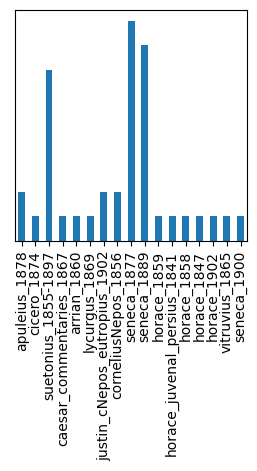

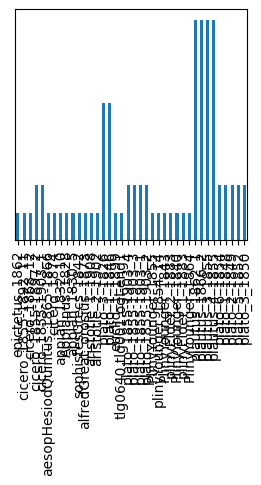

In [194]:
name_counts_top25 = Counter(flat_transl_list_top25)
names_top25 = pd.DataFrame.from_dict(name_counts_top25, orient='index')
names_top25.columns = ["Translation Edition"]
name_counts_bottom25 = Counter(flat_transl_list_bottom25)
names_bottom25 = pd.DataFrame.from_dict(name_counts_bottom25, orient='index')
names_bottom25.columns = ["Translation Edition"]
ax1 = names_top25.plot(kind='bar',figsize=[3,3],legend=False)
ax1.yaxis.set_visible(False)
ax2 = names_bottom25.plot(kind='bar',figsize=[3,3],legend=False)
ax2.yaxis.set_visible(False)

# axes.yaxis.get_ticklabels(which='major')
# axes.yaxis.set_major_formatter(lambda x, t: f'{x:.0f}' if x > 6 else None)



In [179]:
sns.histplot(test_df, x="0")
# fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# axs[0].hist(x=test_df[0], y=unique_editions_top25[1], bins=17)
# axs[1].hist(unique_editions_bottom25[0], bins=17)
# axs[0].axes.get_xaxis().set_visible(False)
# axs[1].axes.get_xaxis().set_visible(False)

ValueError: Could not interpret value `0` for parameter `x`

(array([[ 2.,  2.,  1.,  2.,  1.,  2.,  2.,  1.,  2.,  2.],
        [11.,  3.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,  0.]]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 2 BarContainer objects>)

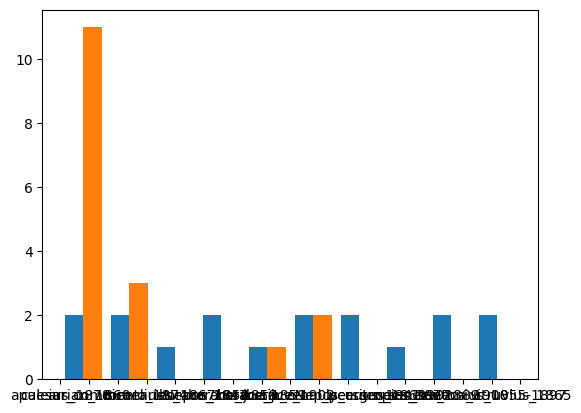

In [77]:
plt.hist(unique_editions_top25)

## Seneca

In [16]:
# get text-level scores of other source texts aligned to Seneca volumes
eval_dicts_dir = "/home/craig.car/repos/chiron/chironata/eval_datafiles/"
not_transl_keys = ["num_src_sents", "num_translations", "text_top1", "text_top5", "text_top10"]

seneca_src_txts1 = "urn:cts:latinLit:stoa0255.stoa010.ogl-fre1 urn:cts:latinLit:stoa0255.stoa006.ogl-fre1 urn:cts:latinLit:stoa0255.stoa007.ogl-fre1 urn:cts:latinLit:stoa0255.stoa008.ogl-fre1 urn:cts:latinLit:stoa0255.stoa012.ogl-fre1 urn:cts:latinLit:phi1017.phi013.ogl-fre1 urn:cts:latinLit:stoa0255.stoa009.ogl-fre1 urn:cts:latinLit:stoa0255.stoa004.ogl-fre1 urn:cts:latinLit:stoa0255.stoa011.ogl-fre1 urn:cts:latinLit:stoa0255.stoa013.ogl-fre1 urn:cts:latinLit:phi1017.phi014.ogl-fre1 urn:cts:latinLit:stoa0255.stoa014.ogl-fre1 urn:cts:latinLit:phi1017.phi011.ogl-fre1 urn:cts:latinLit:phi1017.phi016.ogl-fre1 urn:cts:latinLit:phi1017.phi015.ogl-fre1"
seneca_src_txts2 = "urn:cts:latinLit:phi1017.phi014.ogl-eng1 urn:cts:latinLit:stoa0255.stoa004.ogl-eng1 urn:cts:latinLit:stoa0255.stoa006.ogl-eng1 urn:cts:latinLit:stoa0255.stoa007.ogl-eng1 urn:cts:latinLit:stoa0255.stoa008.ogl-eng1 urn:cts:latinLit:stoa0255.stoa009.ogl-eng1 urn:cts:latinLit:stoa0255.stoa010.ogl-eng1 urn:cts:latinLit:stoa0255.stoa011.ogl-eng1 urn:cts:latinLit:stoa0255.stoa012.ogl-eng1 urn:cts:latinLit:stoa0255.stoa013.ogl-eng1 urn:cts:latinLit:stoa0255.stoa014.ogl-eng1"
seneca_src_txts1 = seneca_src_txts1.split()
for idx, txt in enumerate(seneca_src_txts1):
    seneca_src_txts1[idx] = txt.split(".ogl")[0]

seneca_src_txts2 = seneca_src_txts2.split()
for idx, txt in enumerate(seneca_src_txts2):
    seneca_src_txts2[idx] = txt.split(".ogl")[0]

seneca_src_txts1.extend(seneca_src_txts2)
seneca_src_txts = set(seneca_src_txts1)

seneca_recall_1 = []
seneca_recall_5 = []
seneca_recall_10 = []
for txt in seneca_src_txts:
    # load eval dict
    eval_dict_path = eval_dicts_dir+txt+".json"
    if os.path.isfile(eval_dict_path):
        with open(eval_dict_path) as f:
            txt_eval_json = json.load(f)
        seneca_recall_1.append("%.3f" % txt_eval_json['text_top1'])
        seneca_recall_5.append("%.3f" % txt_eval_json['text_top5'])
        seneca_recall_10.append("%.3f" % txt_eval_json['text_top10'])
    else:
        print(txt)
        to_delete = txt

seneca_src_txts.remove(txt)
seneca_df = pd.DataFrame(seneca_src_txts)
seneca_df.columns = ["texts"]
seneca_df["recall@1"] = seneca_recall_1
seneca_df["recall@15"] = seneca_recall_5
seneca_df["recall@10"] = seneca_recall_10
seneca_df.sort_values("recall@10", ascending=False)

urn:cts:latinLit:phi1017.phi016


,texts,recall@1,recall@15,recall@10
6,urn:cts:latinLit:stoa0255.stoa013,0.687,0.872,0.936
13,urn:cts:latinLit:stoa0255.stoa004,0.674,0.860,0.931
12,urn:cts:latinLit:stoa0255.stoa007,0.671,0.863,0.929
1,urn:cts:latinLit:stoa0255.stoa006,0.704,0.873,0.928
9,urn:cts:latinLit:stoa0255.stoa008,0.705,0.873,0.928
2,urn:cts:latinLit:stoa0255.stoa010,0.664,0.858,0.919
7,urn:cts:latinLit:stoa0255.stoa011,0.686,0.855,0.914
10,urn:cts:latinLit:phi1017.phi016,0.663,0.840,0.903
8,urn:cts:latinLit:stoa0255.stoa009,0.660,0.813,0.874
4,urn:cts:latinLit:phi1017.phi014,0.674,0.822,0.869


## Suetonius

In [17]:
# get text-level scores of other source texts aligned to Suetonius volumes
eval_dicts_dir = "/home/craig.car/repos/chiron/chironata/eval_datafiles/"
not_transl_keys = ["num_src_sents", "num_translations", "text_top1", "text_top5", "text_top10"]

suetonius_src_txts = "urn:cts:latinLit:phi1348.phi001.ogl-ger1 urn:cts:latinLit:phi1348.abo011.ogl-ger1  urn:cts:latinLit:phi1348.abo012.ogl-ger1  urn:cts:latinLit:phi1348.abo013.ogl-ger1  urn:cts:latinLit:phi1348.abo014.ogl-ger1  urn:cts:latinLit:phi1348.abo015.ogl-ger1  urn:cts:latinLit:phi1348.abo016.ogl-ger1  urn:cts:latinLit:phi1348.abo017.ogl-ger1  urn:cts:latinLit:phi1348.abo018.ogl-ger1  urn:cts:latinLit:phi1348.abo019.ogl-ger1  urn:cts:latinLit:phi1348.abo020.ogl-ger1  urn:cts:latinLit:phi1348.abo021.ogl-ger1  urn:cts:latinLit:phi1348.abo022.ogl-ger1"
suetonius_src_txts = suetonius_src_txts.split()
for idx, txt in enumerate(suetonius_src_txts):
    suetonius_src_txts[idx] = txt.split(".ogl")[0]
suetonius_src_txts = set(suetonius_src_txts)

suetonius_recall_1 = []
suetonius_recall_5 = []
suetonius_recall_10 = []
for txt in suetonius_src_txts:
    # load eval dict
    eval_dict_path = eval_dicts_dir+txt+".json"
    if os.path.isfile(eval_dict_path):
        with open(eval_dict_path) as f:
            txt_eval_json = json.load(f)
        suetonius_recall_1.append("%.3f" % txt_eval_json['text_top1'])
        suetonius_recall_5.append("%.3f" % txt_eval_json['text_top5'])
        suetonius_recall_10.append("%.3f" % txt_eval_json['text_top10'])
    else:
        print(txt)
        to_delete = txt

suetonius_src_txts.remove(txt)
suetonius_df = pd.DataFrame(suetonius_src_txts)
suetonius_df.columns = ["texts"]
suetonius_df["recall@1"] = suetonius_recall_1
suetonius_df["recall@15"] = suetonius_recall_5
suetonius_df["recall@10"] = suetonius_recall_10
suetonius_df.sort_values("recall@10")
suetonius_df

urn:cts:latinLit:phi1348.phi001


,texts,recall@1,recall@15,recall@10
0,urn:cts:latinLit:phi1348.abo020,0.531,0.718,0.797
1,urn:cts:latinLit:phi1348.phi001,0.586,0.748,0.816
2,urn:cts:latinLit:phi1348.abo016,0.716,0.865,0.919
3,urn:cts:latinLit:phi1348.abo012,0.673,0.856,0.923
4,urn:cts:latinLit:phi1348.abo022,0.710,0.914,0.985
5,urn:cts:latinLit:phi1348.abo011,0.630,0.779,0.844
6,urn:cts:latinLit:phi1348.abo017,0.556,0.731,0.787
7,urn:cts:latinLit:phi1348.abo019,0.696,0.840,0.883
8,urn:cts:latinLit:phi1348.abo015,0.581,0.811,0.919
9,urn:cts:latinLit:phi1348.abo021,0.700,0.857,0.911


# Size of dataset

In [18]:
eval_df["number_src_sents"].sum()

579711

In [19]:
eval_df["num_tgt_sents_all_translations"].sum()

16430361

In [20]:
eval_df["number_translations"].sum()

2102

# Bottom 25 texts by recall @10

In [21]:
eval_df.sort_values("text_wide_recall@10", ascending=[True]).head(25)

,ctsurn,number_src_sents,number_translations,names_translations,translation_languages,num_tgt_sents_all_translations,num_src2null_all_translations,text_wide_recall@1,text_wide_recall@5,text_wide_recall@10,translations_recall@10
434,urn:cts:greekLit:tlg0074.tlg008,9,1,[epictetus_1862],{fr},9106,[0],0.000000,0.000000,0.000000,[0.000]
582,urn:cts:latinLit:phi0474.phi035,4047,2,"[cicero_1855-1892_11, cicero_1868_12]",{de},9216,"[8, 2]",0.000741,0.005313,0.008772,"[0.010, 0.008]"
596,urn:cts:latinLit:phi0474.phi056,6913,2,"[cicero_1855-1897_2, cicero_1855-1903_1]",{de},11366,"[398, 634]",0.001374,0.004484,0.008969,"[0.010, 0.008]"
463,urn:cts:greekLit:tlg0096.tlg002,6062,1,[aesopHesiodQuintus_1865-1866],{de},7368,[1],0.000660,0.006434,0.012042,[0.012]
597,urn:cts:latinLit:phi0474.phi057,10677,3,"[cicero_1874, cicero_1855-1897_2, cicero_1855-...","{en, de}",17058,"[2629, 2303, 2432]",0.002716,0.007586,0.012394,"[0.010, 0.017, 0.011]"
515,urn:cts:greekLit:tlg0551.tlg017,3744,3,"[appian_1832_10, Appianus_1828, appian_1830_5]",{de},26318,"[0, 4, 0]",0.001781,0.007746,0.013177,"[0.014, 0.015, 0.010]"
521,urn:cts:greekLit:tlg0563.tlg001,2288,1,[sophistesGrecs_1842],{fr},7988,[0],0.000437,0.003934,0.013986,[0.014]
698,urn:cts:latinLit:stoa0215c.stoa001,4074,1,[alfredGreat_orosius_1873],{en},5828,[4],0.004418,0.009818,0.016446,[0.016]
532,urn:cts:greekLit:tlg2034.tlg007,2591,2,"[aristotle_1_1908, aristotle_2_1902]",{en},12615,"[2, 0]",0.002316,0.011772,0.020069,"[0.018, 0.022]"
343,urn:cts:greekLit:tlg0059.tlg013,2013,2,"[plato_3_1826, plato_1_1846]",{fr},7106,"[0, 0]",0.001739,0.010432,0.020368,"[0.017, 0.023]"


In [22]:
# get average length of source texts (by number of source sentences)
np.average(np.array(eval_df.sort_values("text_wide_recall@10", ascending=[True]).head(25)["number_src_sents"]))

3813.08

In [59]:
# number translations in bottom 25
number_transl_bottom25 = np.sum(np.array(eval_df.sort_values("text_wide_recall@10", ascending=[True]).head(25)["number_translations"]))
number_transl_bottom25

97

In [62]:
# Book coverage
all_coverage = []
bottom25_src2null = np.array(eval_df.sort_values("text_wide_recall@10", ascending=[True]).head(25)["num_src2null_all_translations"])
num_src_sents_bottom25 = np.array(eval_df.sort_values("text_wide_recall@10", ascending=[True]).head(25)["number_src_sents"])
weighted_avg_bottom25 = 0
for idx, sublist in enumerate(bottom25_src2null):
    for num in sublist:
        weighted_avg_bottom25 += num/num_src_sents_bottom25[idx]/number_transl_bottom25
        all_coverage.append(num/num_src_sents_bottom25[idx])
        # print(f"nulls: {num}, num src sents: {num_src_sents[idx]}")
1-weighted_avg_bottom25

0.96235026096136

In [65]:
# get the max null ratio
print(np.max(np.array(all_coverage)))

# min coverage: 1-null ratio
print(1-np.max(np.array(all_coverage)))

0.5236647998907253
0.47633520010927466


In [23]:
(13803+ 15199+ 14174+ 10783+ 15335+ 1377+ 11432)/7

11729.0

In [24]:
(2629 + 2303 + 2432)/3

2454.6666666666665

In [69]:
# get list of translation editions: unique values and counts
names_transl_bottom25 = np.array(eval_df.sort_values("text_wide_recall@10", ascending=[True]).head(25)["names_translations"])
flat_transl_list_bottom25 = np.array(flatten_list(names_transl_bottom25))
unique_editions_bottom25 = np.unique(flat_transl_list_bottom25, return_counts=True)
print(f"num unique editions: {len(unique_editions_bottom25[0])} and editions are: {unique_editions_bottom25}")
for idx, count in enumerate(unique_editions_bottom25[1]):
    if count == 8:
        print(f"count of {unique_editions_bottom25[0][idx]}: 8")
    elif count == 5:
        print(f"count of {unique_editions_bottom25[0][idx]}: 5")

num unique editions: 38 and editions are: (array(['Appianus_1828', 'PlinyYounger_1840', 'PlinyYounger_1843',
       'PlinyYounger_1855', 'PlinyYounger_1864',
       'aesopHesiodQuintus_1865-1866', 'alfredGreat_orosius_1873',
       'appian_1830_5', 'appian_1832_10', 'aristotle_1_1908',
       'aristotle_2_1902', 'cicero_1855-1892_11', 'cicero_1855-1897_2',
       'cicero_1855-1903_1', 'cicero_1868_12', 'cicero_1874',
       'epictetus_1862', 'euclid_1_1899', 'plato_1855-1903_1',
       'plato_1855-1903_2', 'plato_1855-1903_3', 'plato_1855-1903_4',
       'plato_1_1846', 'plato_1_1848', 'plato_2_1849', 'plato_3_1826',
       'plato_3_1850', 'plato_5_1852', 'plato_6_1854', 'plautus_1862_1',
       'plautus_1866_2', 'plautus_3_1855', 'plautus_4_1855',
       'plinyElder_1_1883', 'plinyElder_2_1883', 'plinyYounger_1854_14',
       'sophistesGrecs_1842', 'tlg0640.tlg001.ogl-eng1'], dtype='<U28'), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       5, 2, 2, 5, 2, 

## Plautus
TODO:
- get scores of other source texts aligned to the 4 volumes of Plautus that are not in bottom 25
- look for differences across the texts in and not in bottom 25

In [26]:
# get text-level scores of other source texts aligned to Plautus volumes
eval_dicts_dir = "/home/craig.car/repos/chiron/chironata/eval_datafiles/"
not_transl_keys = ["num_src_sents", "num_translations", "text_top1", "text_top5", "text_top10"]

src_txts_vol1 = "urn:cts:latinLit:phi0119.phi010.ogl-ger1 urn:cts:latinLit:phi0119.phi012.ogl-ger1 urn:cts:latinLit:phi0119.phi019.ogl-ger1 urn:cts:latinLit:phi0119.phi013.ogl-ger1 urn:cts:latinLit:phi0119.phi007.ogl-ger1 urn:cts:latinLit:phi0119.phi017.ogl-ger1 urn:cts:latinLit:phi0119.phi011.ogl-ger1 urn:cts:latinLit:phi0119.phi002.ogl-ger1 urn:cts:latinLit:phi0119.phi005.ogl-ger1 urn:cts:latinLit:phi0119.phi003.ogl-ger1 urn:cts:latinLit:phi0119.phi015.ogl-ger1 urn:cts:latinLit:phi0119.phi016.ogl-ger1 urn:cts:latinLit:phi0119.phi004.ogl-ger1 urn:cts:latinLit:phi0119.phi018.ogl-ger1 urn:cts:latinLit:phi0119.phi009.ogl-ger1 urn:cts:latinLit:phi0119.phi014.ogl-ger1 urn:cts:latinLit:phi0119.phi006.ogl-ger1 urn:cts:latinLit:phi0119.phi020.ogl-ger1"
src_txts_vol1 = src_txts_vol1.split()
for idx, txt in enumerate(src_txts_vol1):
    src_txts_vol1[idx] = txt.split(".ogl-ger1")[0]
recall_1 = []
recall_5 = []
recall_10 = []
for txt in src_txts_vol1:
    # load eval dict
    eval_dict_path = eval_dicts_dir+txt+".json"
    with open(eval_dict_path) as f:
        txt_eval_json = json.load(f)
    recall_1.append("%.3f" % txt_eval_json['text_top1'])
    recall_5.append("%.3f" % txt_eval_json['text_top5'])
    recall_10.append("%.3f" % txt_eval_json['text_top10'])
plautus_df = pd.DataFrame(src_txts_vol1)
plautus_df.columns = ["texts"]
plautus_df["recall@1"] = recall_1
plautus_df["recall@15"] = recall_5
plautus_df["recall@10"] = recall_10
plautus_df.sort_values("recall@10")

,texts,recall@1,recall@15,recall@10
3,urn:cts:latinLit:phi0119.phi013,0.008,0.027,0.045
11,urn:cts:latinLit:phi0119.phi016,0.010,0.028,0.045
5,urn:cts:latinLit:phi0119.phi017,0.008,0.027,0.047
10,urn:cts:latinLit:phi0119.phi015,0.008,0.028,0.048
1,urn:cts:latinLit:phi0119.phi012,0.012,0.031,0.049
12,urn:cts:latinLit:phi0119.phi004,0.011,0.032,0.049
8,urn:cts:latinLit:phi0119.phi005,0.007,0.029,0.051
6,urn:cts:latinLit:phi0119.phi011,0.007,0.029,0.054
2,urn:cts:latinLit:phi0119.phi019,0.015,0.038,0.056
15,urn:cts:latinLit:phi0119.phi014,0.010,0.033,0.058


## Plato

In [27]:
# get text-level scores of other source texts aligned to Plato volumes
eval_dicts_dir = "/home/craig.car/repos/chiron/chironata/eval_datafiles/"
not_transl_keys = ["num_src_sents", "num_translations", "text_top1", "text_top5", "text_top10"]

plato_src_txts = "urn:cts:greekLit:tlg0059.tlg001.ogl-fre1 urn:cts:greekLit:tlg0059.tlg002.ogl-fre1  urn:cts:greekLit:tlg0059.tlg003.ogl-fre1  urn:cts:greekLit:tlg0059.tlg004.ogl-fre1 urn:cts:greekLit:tlg0059.tlg022.ogl-fre1 urn:cts:greekLit:tlg0059.tlg023.ogl-fre1 urn:cts:greekLit:tlg0059.tlg020.ogl-fre1 urn:cts:greekLit:tlg0059.tlg026.ogl-fre1 urn:cts:greekLit:tlg0059.tlg028.ogl-fre1 urn:cts:greekLit:tlg0059.tlg027.ogl-fre1 urn:cts:greekLit:tlg0059.tlg025.ogl-fre1 urn:cts:greekLit:tlg0059.tlg021.ogl-fre1 urn:cts:greekLit:tlg0059.tlg013.ogl-fre1 urn:cts:greekLit:tlg0059.tlg014.ogl-fre1 urn:cts:greekLit:tlg0059.tlg015.ogl-fre1 urn:cts:greekLit:tlg0059.tlg016.ogl-fre1 urn:cts:greekLit:tlg0059.tlg017.ogl-fre1 urn:cts:greekLit:tlg0059.tlg018.ogl-fre1 urn:cts:greekLit:tlg0059.tlg019.ogl-fre1 urn:cts:greekLit:tlg0059.tlg012.ogl-fre1 urn:cts:greekLit:tlg0059.tlg024.ogl-fre1 urn:cts:greekLit:tlg0059.tlg011.ogl-fre1 urn:cts:greekLit:tlg0059.tlg034.ogl-fre1 urn:cts:greekLit:tlg0059.tlg007.ogl-fre1 urn:cts:greekLit:tlg0059.tlg008.ogl-fre1"
plato_src_txts = plato_src_txts.split()
for idx, txt in enumerate(plato_src_txts):
    plato_src_txts[idx] = txt.split(".ogl")[0]
plato_recall_1 = []
plato_recall_5 = []
plato_recall_10 = []
for txt in plato_src_txts:
    # load eval dict
    eval_dict_path = eval_dicts_dir+txt+".json"
    with open(eval_dict_path) as f:
        txt_eval_json = json.load(f)
    plato_recall_1.append("%.3f" % txt_eval_json['text_top1'])
    plato_recall_5.append("%.3f" % txt_eval_json['text_top5'])
    plato_recall_10.append("%.3f" % txt_eval_json['text_top10'])

plato_df = pd.DataFrame(plato_src_txts)
plato_df.columns = ["texts"]
plato_df["recall@1"] = plato_recall_1
plato_df["recall@15"] = plato_recall_5
plato_df["recall@10"] = plato_recall_10
plato_df.sort_values("recall@10")

,texts,recall@1,recall@15,recall@10
12,urn:cts:greekLit:tlg0059.tlg013,0.002,0.010,0.020
18,urn:cts:greekLit:tlg0059.tlg019,0.007,0.021,0.038
10,urn:cts:greekLit:tlg0059.tlg025,0.007,0.023,0.046
24,urn:cts:greekLit:tlg0059.tlg008,0.018,0.037,0.046
20,urn:cts:greekLit:tlg0059.tlg024,0.018,0.039,0.051
23,urn:cts:greekLit:tlg0059.tlg007,0.027,0.046,0.059
7,urn:cts:greekLit:tlg0059.tlg026,0.009,0.041,0.070
17,urn:cts:greekLit:tlg0059.tlg018,0.024,0.052,0.075
2,urn:cts:greekLit:tlg0059.tlg003,0.017,0.052,0.078
13,urn:cts:greekLit:tlg0059.tlg014,0.011,0.048,0.079


# Summary stats of text-wide recall @1, 5, 10

In [28]:
eval_df[["text_wide_recall@1", "text_wide_recall@5", "text_wide_recall@10"]].describe()

,text_wide_recall@1,text_wide_recall@5,text_wide_recall@10
count,709.000000,709.000000,709.000000
mean,0.216676,0.327088,0.387606
std,0.169975,0.204115,0.211675
min,0.000000,0.000000,0.000000
25%,0.085965,0.180952,0.246753
50%,0.180055,0.296970,0.363636
75%,0.306818,0.449923,0.511438
max,0.776231,0.989796,1.043367


# Experiment: concatenate Plautus src text to match tgt edition

In [29]:
src_sents_dir = "/home/craig.car/repos/chiron/chironata/data/src_data/"

tgt_vol1 = "plautus_1862_1"
src_txt_vol1 = [
    "urn:cts:latinLit:phi0119.phi010",
    "urn:cts:latinLit:phi0119.phi012", 
    "urn:cts:latinLit:phi0119.phi019", 
    "urn:cts:latinLit:phi0119.phi013"]

tgt_vol2 = "plautus_1866_2"
src_txt_vol2 = [
    "urn:cts:latinLit:phi0119.phi007",
    "urn:cts:latinLit:phi0119.phi017",
    "urn:cts:latinLit:phi0119.phi011",
    "urn:cts:latinLit:phi0119.phi002",
    "urn:cts:latinLit:phi0119.phi005"]

tgt_vol3 = "plautus_3_1855"
src_txt_vol3 = [
    "urn:cts:latinLit:phi0119.phi003",
    "urn:cts:latinLit:phi0119.phi015",
    "urn:cts:latinLit:phi0119.phi016",
    "urn:cts:latinLit:phi0119.phi004",
    "urn:cts:latinLit:phi0119.phi018"]

tgt_vol4 = "plautus_4_1855"
src_txt_vol4 = [
    "urn:cts:latinLit:phi0119.phi009",
    "urn:cts:latinLit:phi0119.phi014",
    "urn:cts:latinLit:phi0119.phi006",
    "urn:cts:latinLit:phi0119.phi020"]

In [30]:
def concatenate_src(src_txts_lst, src_dir):
    concatenated_src = []
    len_counter = 0
    for file in src_txts_lst:
        text = load_txt_as_lst(src_dir+file+".sents")
        len_counter += len(text)
        print(f"adding file {file}")
        concatenated_src.extend(text)
    concatenated_src = [sent.rstrip("\n") for sent in concatenated_src]
    return concatenated_src, len_counter

## Vol 1

In [31]:
src_vol1, len_check = concatenate_src(src_txt_vol1, src_sents_dir)

adding file urn:cts:latinLit:phi0119.phi010
adding file urn:cts:latinLit:phi0119.phi012
adding file urn:cts:latinLit:phi0119.phi019
adding file urn:cts:latinLit:phi0119.phi013


In [32]:
len(src_vol1) == len_check

True

In [33]:
dir_out = "/home/craig.car/repos/chiron/chironata/data/concatenated_src_data/"
# write_file(src_vol1, dir_out+"src_plautus_vol1.sents")

In [34]:
# load vol1 eval dict
eval_path = "/home/craig.car/repos/chiron/chironata/data/concatenated_src_data/src_plautus_vol1_evaldict.json"
with open(eval_path) as f:
    plautus_vol1_eval = json.load(f)

In [35]:
plautus_vol1_eval.keys()

dict_keys(['num_src_sents', 'tgt_lang', 'text_top1', 'text_top5', 'text_top10'])

In [36]:
print(plautus_vol1_eval["text_top1"])
print(plautus_vol1_eval["text_top5"])
print(plautus_vol1_eval["text_top10"])

0.1443850267379679
0.2161165406601512
0.24543610547667344


In [37]:
# compare to texts before concatenating
for text in src_txt_vol1:
    print(plautus_df.loc[plautus_df["texts"]==text])

                             texts recall@1 recall@15 recall@10
0  urn:cts:latinLit:phi0119.phi010    0.065     0.119     0.154
                             texts recall@1 recall@15 recall@10
1  urn:cts:latinLit:phi0119.phi012    0.012     0.031     0.049
                             texts recall@1 recall@15 recall@10
2  urn:cts:latinLit:phi0119.phi019    0.015     0.038     0.056
                             texts recall@1 recall@15 recall@10
3  urn:cts:latinLit:phi0119.phi013    0.008     0.027     0.045


In [38]:
### length of concatenated source is longer than the tgt document (vol1 in de) ####

## Vol 2

In [39]:
src_vol2, len_check2 = concatenate_src(src_txt_vol2, src_sents_dir)
len(src_vol2) == len_check2

adding file urn:cts:latinLit:phi0119.phi007
adding file urn:cts:latinLit:phi0119.phi017
adding file urn:cts:latinLit:phi0119.phi011
adding file urn:cts:latinLit:phi0119.phi002
adding file urn:cts:latinLit:phi0119.phi005


True

In [40]:
write_file(src_vol1, dir_out+"src_plautus_vol2.sents")